In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

nights = pd.read_csv('/Users/jinny/Documents/touristcast/datasets/nights_2010-2017.csv', index_col='date', parse_dates=['date'], 
                          usecols=[*range(1, 15)])

### Monthly hotel nights per year per region
- Data from 2010 to 2017
- Darker colour = later data (darkest color = 2017)
- **Important** y-axis scale differs greatly depending on the region; plots below to show overall seasons in raw data

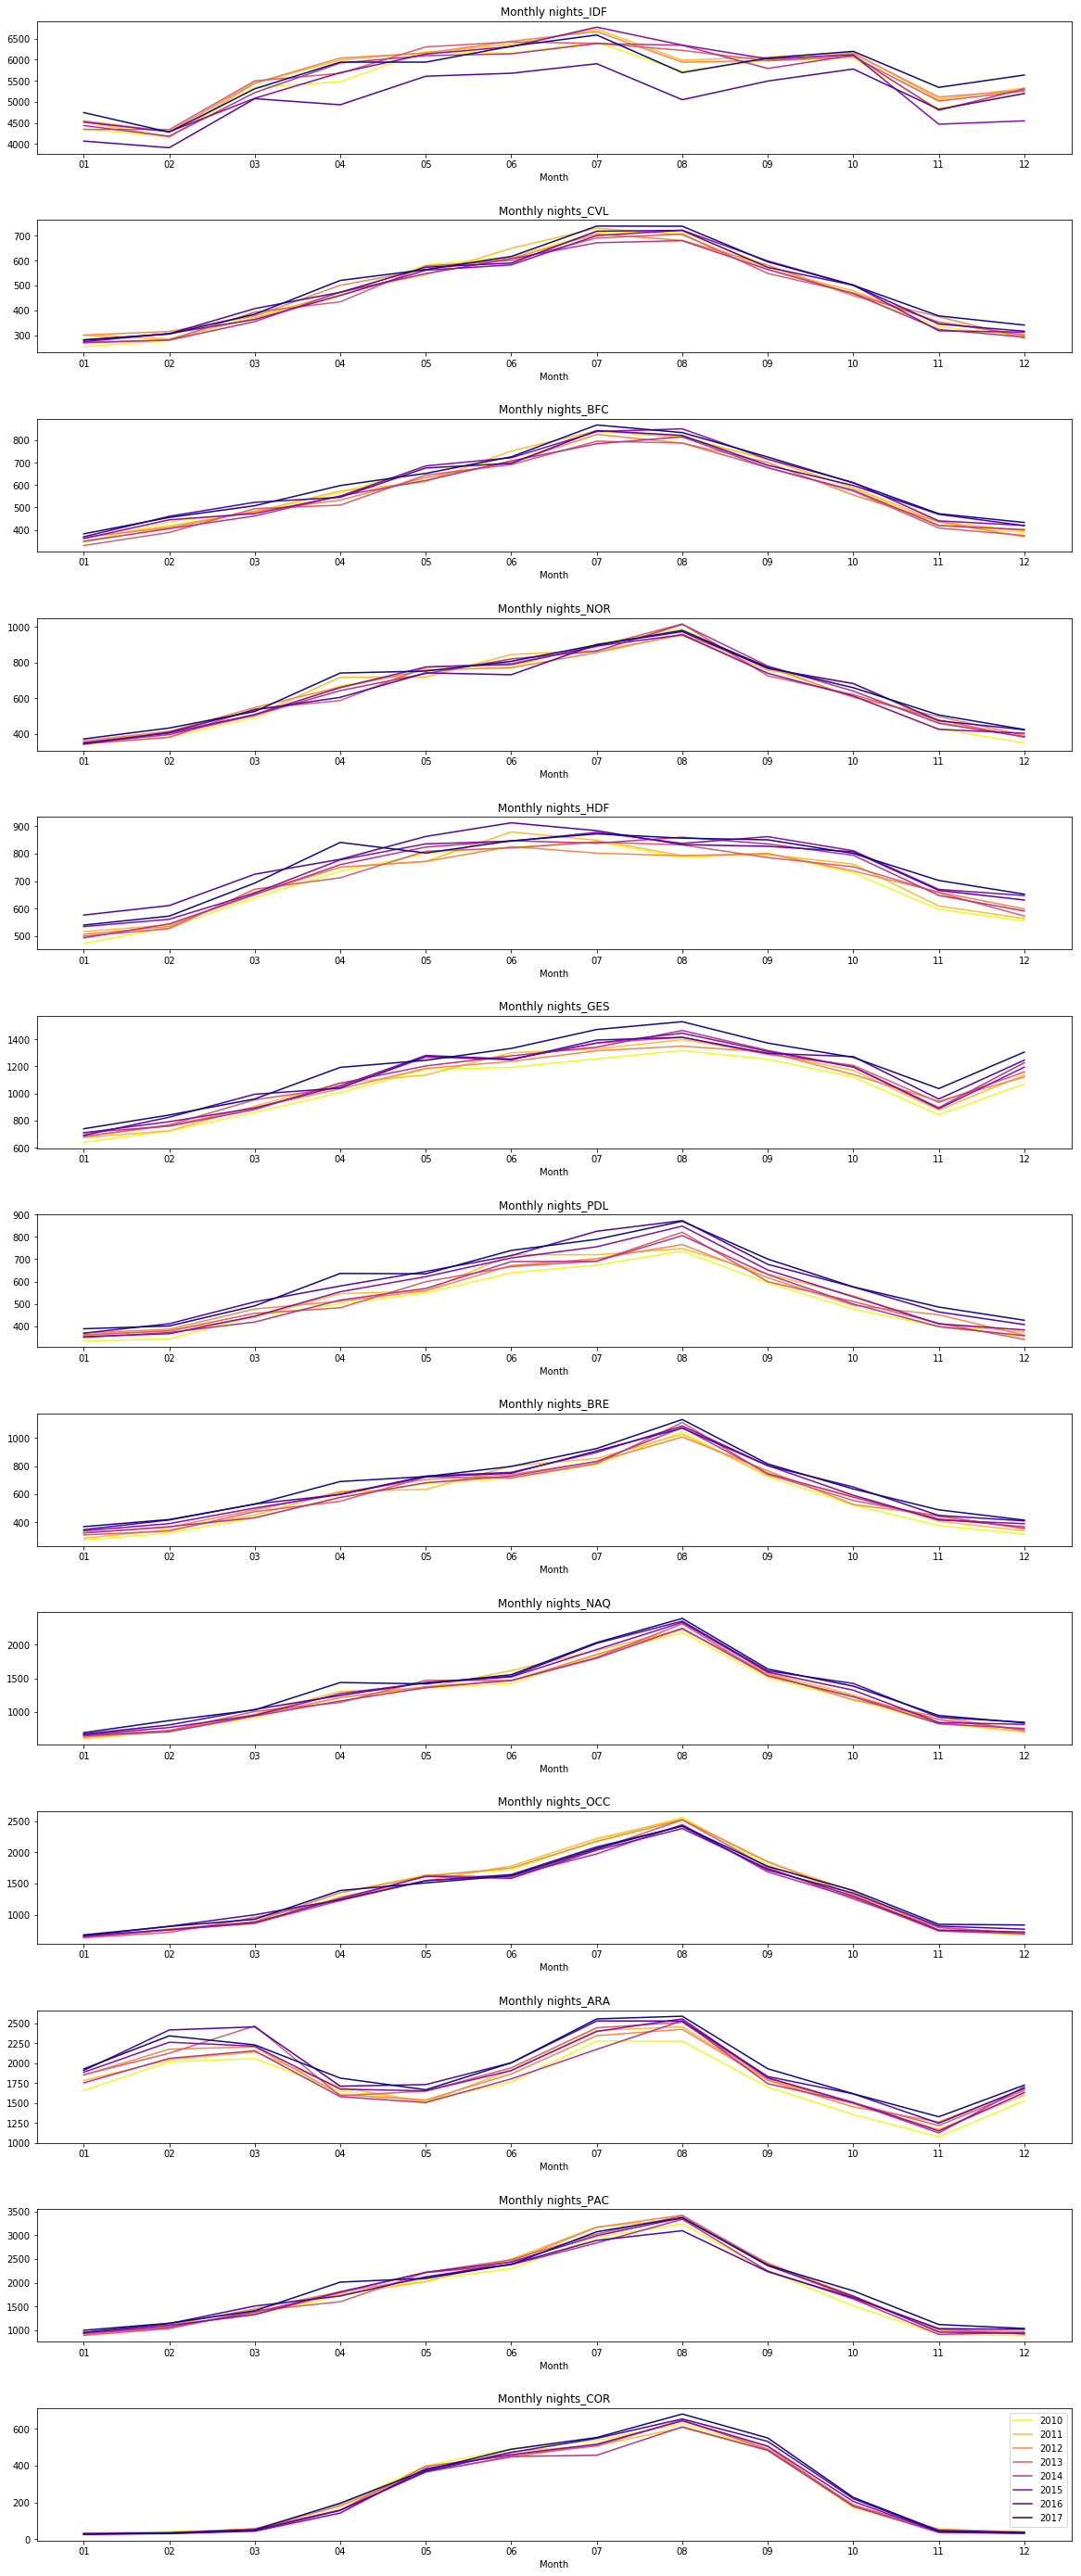

In [5]:
from matplotlib import cm

dates = [dt.datetime(2016,1,1) + dt.timedelta(days=i*31) for i in range(12)]
colors = cm.plasma_r(np.linspace(0, 1, len(range(2010, 2018))))

fig, axes = plt.subplots(len(nights.columns), 1, figsize=(20,50))

for i, region in enumerate(nights.columns):
    for j, year in enumerate(range(2010, 2018)):
        axes[i].plot(dates, nights[region][(nights.index>=str(year))&(nights.index<str(year+1))], label=year, color=colors[j])
    axes[i].set_xticks(dates)
    axes[i].set_xlabel('Month')
    axes[i].set_xticklabels([d.strftime('%m') for d in dates])
    axes[i].set_title(f'Monthly {region}')
plt.legend()
plt.subplots_adjust(hspace=0.5);